### Graphviz

[Video](https://youtu.be/X9eXLHfRoUc)

Graphviz dient zur Visualisierung von Graphen

[Graphviz-Webseite](https://graphviz.org/) - [Graphviz-Online](https://dreampuf.github.io/GraphvizOnline) - [Doku python package graphviz](https://graphviz.readthedocs.io/en/stable/)

#### Installation

- Öffne die Webseite: https://graphviz.org/download/
- Unter Windows → wähle den Installer (z. B. graphviz-14.0.0 (64-bit) EXE installer).
- Lade die Datei herunter und führe sie aus.
- Klicke dich durch die Installation (Standard-Einstellungen reichen).
 
Achte darauf, dass während der Installation die Option “Add Graphviz to the system PATH” aktiviert ist.
Falls nicht, muss man später den Installationspfad manuell zu den Umgebungsvariablen hinzufügen.

Installationstest in Windows-Eingabeaufforderung:

In [ ]:
dot -V

Installiere danach das Python-Package graphviz 

- pip install graphviz

#### Gerichtete ungewichtete Graphen

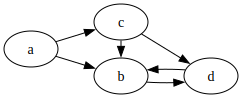

In [5]:
from graphviz import Digraph

G = {
    'a': set('bc'),
    'b': set('d'),
    'c': set('bd'),
    'd': set('b')
}

dot = Digraph()
dot.attr(rankdir='LR')
dot.body.append("{ rank=same; b; c }")

for u, neighbors in G.items():
    for v in neighbors:
        dot.edge(u, v)

dot

#### Gerichtete gewichtete Graphen

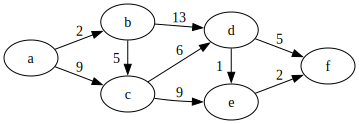

In [9]:
from graphviz import Digraph

G = {
    'a': {'b': 2, 'c': 9},
    'b': {'c': 5, 'd': 13},
    'c': {'d': 6, 'e': 9},
    'd': {'e': 1, 'f': 5},
    'e': {'f': 2},
    'f': {}
}

dot = Digraph(engine='dot')
dot.attr(rankdir='LR')
dot.body.append("{ rank=same; b; c }")
dot.body.append("{ rank=same; d; e }")

# Kanten mit Labels hinzufügen
for u, neighbors in G.items():
    for v, w in neighbors.items():
        dot.edge(u, v, label=str(w))

dot

#### Ungerichtete ungewichtete Graphen

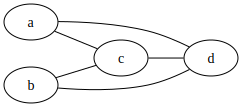

In [13]:
from graphviz import Graph

G = {
    'a': set('cd'),
    'b': set('cd'),
    'c': set('abd'),
    'd': set('acb')
}

dot = Graph()
dot.attr(rankdir='LR')

# Set für schon hinzugefügte Kanten
added_edges = set()

for u, neighbors in G.items():
    for v in neighbors:
        # sortieren, damit ('c','d') == ('d','c')
        edge = tuple(sorted([u, v]))
        if edge not in added_edges:
            dot.edge(u, v)
            added_edges.add(edge)

dot 




#### Ungerichtete gewichtete Graphen

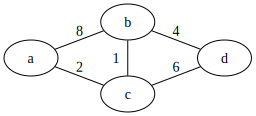

In [14]:
from graphviz import Graph

G = {'a': {'b':8, 'c':2},          
     'b': {'a':8, 'd':4, 'c':1},               
     'c': {'a':2, 'b':1, 'd':6},
     'd': {'b':4, 'c':6},
    }  

dot = Graph()
dot.attr(rankdir='LR')
dot.body.append("{ rank=same; c; b }")

added_edges = set()
for u, neighbors in G.items():
    for v in neighbors:
        edge = tuple(sorted([u, v]))
        if edge not in added_edges:
            dot.edge(u, v, label=str(G[u][v]))
            added_edges.add(edge)

dot 

### Graphen Layout ändern

Graphviz hat verschiedene Engines, die den Graph automatisch anders anordnen:

- dot → hierarchisch (Standard für gerichtete Graphen, Baumstruktur von oben nach unten)
- neato → „physikalisch“ basiertes Layout (Knoten verteilen sich frei im Raum)
- fdp → ähnlich wie neato, aber für ungerichtete Graphen optimiert
- circo → ordnet Knoten kreisförmig an
- twopi → ordnet Knoten radial um die Wurzel an

Zusammen mit *rankdir* und *rank=same* lassen sich in den meisten Fällen brauchbare Ergebnisse erreichen.

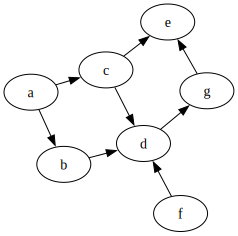

In [27]:
from graphviz import Digraph

G = {'a': set('bc'),
     'b': set('d'),
     'c': set('ed'),
     'd': set('g'),
     'e': set(),
     'f': set('d'),
     'g': set('e')}  

dot = Digraph(engine='neato')
dot.attr(rankdir='LR')
dot.body.append("{ rank=same; a; b; f }")
dot.body.append("{ rank=same; g; e }")
dot.body.append("{ rank=same; c; d }")

for u, neighbors in G.items():
    for v in neighbors:
        dot.edge(u, v)

dot

#### Feste Positionen

Mit neato und pos können wir feste Positionen vergeben, z. B. für ein Viereck oder für einzelne Knoten.
Das ! hinter den Koordinaten bedeutet: „Graphviz darf das nicht mehr verschieben“.

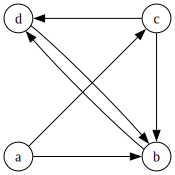

In [28]:
from graphviz import Digraph

G = {
    'a': set('bc'),
    'b': set('d'),
    'c': set('bd'),
    'd': set('b')
}

dot = Digraph(engine="neato")
dot.attr(splines="false", overlap="false")

# feste Positionen (Quadrat)
positions = {
    'a': "0,0!",
    'b': "1,0!",
    'c': "1,1!",
    'd': "0,1!"
}

for node, pos in positions.items():
    dot.node(node, pos=pos, shape="circle", width="0.4", fixedsize="true")

for u, neighbors in G.items():
    for v in neighbors:
        dot.edge(u, v)

dot

#### Knoten formatieren

Wir können Form, Farbe und Label der Knoten verändern.

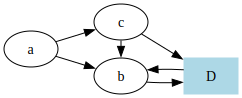

In [30]:
from graphviz import Digraph

G = {
    'a': set('bc'),
    'b': set('d'),
    'c': set('bd'),
    'd': set('b')
}

dot = Digraph()
dot.attr(rankdir='LR')
dot.body.append("{ rank=same; b; c }")
dot.node('d', shape='rect', style='filled', color='lightblue', label='D')

for u, neighbors in G.items():
    for v in neighbors:
        dot.edge(u, v)

dot

#### Außerhalb Jupyter-Notebooks

Wenn wir das Programm außerhalb von Jupyter-Notebooks starten, fügen wir format='png' hinzu und rufen die render-Funktion auf.



In [31]:
import 

G = {
    'a': set('bc'),
    'b': set('d'),
    'c': set('bd'),
    'd': set('b')
}

dot = Digraph(format='png')
dot.attr(rankdir='LR')
dot.body.append("{ rank=same; b; c }")

for u, neighbors in G.items():
    for v in neighbors:
        dot.edge(u, v)

dot.render('mygraph',view=True)

'mygraph.png'

#### Dot-Sourcen 

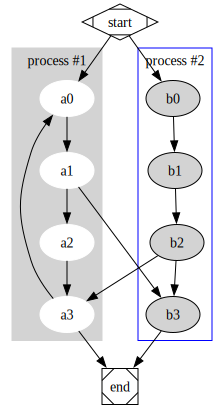

In [38]:
from graphviz import Source
s = '''
digraph G {

  subgraph cluster_0 {
    style=filled;
    color=lightgrey;
    node [style=filled,color=white];
    a0 -> a1 -> a2 -> a3;
    label = "process #1";
  }

  subgraph cluster_1 {
    node [style=filled];
    b0 -> b1 -> b2 -> b3;
    label = "process #2";
    color=blue
  }
  start -> a0;
  start -> b0;
  a1 -> b3;
  b2 -> a3;
  a3 -> a0;
  a3 -> end;
  b3 -> end;

  start [shape=Mdiamond];
  end [shape=Msquare];
}
'''
Source(s)